pip install opencv-python

### Problem 1

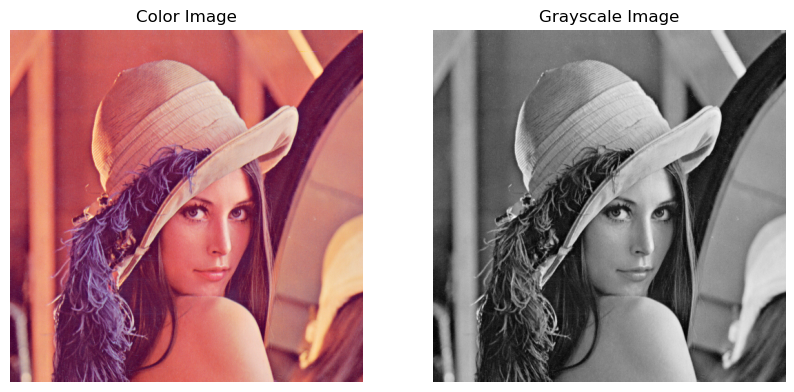

In [5]:
# Print Lena Image from ChatGPT

# Import necessary libraries
import cv2 # OpenCV for image processing
import numpy as np
import matplotlib.pyplot as plt  # Matplotlib for displaying images


# Load the Lena image in color
# If you're using a local file, replace 'lena.png' with the full path to the image
color_image = cv2.imread("C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env//pictures/lena.png")  # Read the image using OpenCV (BGR format)

# Convert the color image from BGR to RGB (for proper color display in matplotlib)
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Convert the color image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Create a figure to display both images side by side
plt.figure(figsize=(10, 5)) 

# Display the color image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(color_image_rgb)  # Show the image in RGB
plt.title('Color Image')  # Set title
plt.axis('off')  # Turn off axis labels

# Display the grayscale image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(gray_image, cmap='gray')  # Show the image in grayscale
plt.title('Grayscale Image')  # Set title
plt.axis('off')  # Turn off axis labels

# Show the figure with both images
plt.show()

### Problem 2

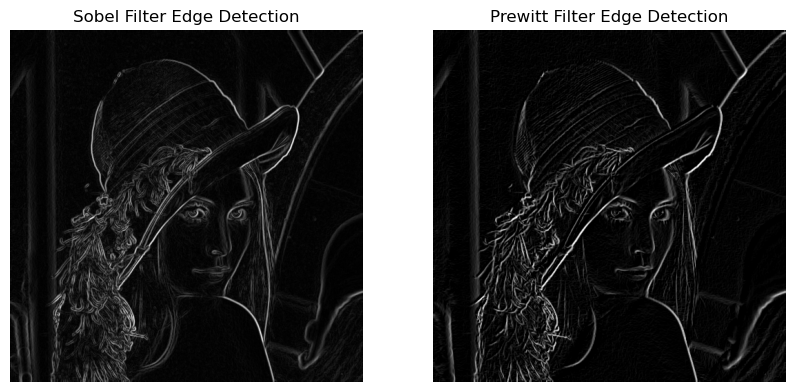

In [6]:
# Apply Sobel filter for edge detection
# Sobel filter in x direction
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
# Sobel filter in y direction
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
# Combine the two directions using magnitude
sobel_edges = cv2.magnitude(sobel_x, sobel_y)


# Prewitt filter manually since OpenCV doesn't have Prewitt directly
# Define Prewitt kernels for x and y directions
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

# Apply Prewitt filter in x direction
prewitt_x = cv2.filter2D(gray_image, -1, prewitt_kernel_x)
# Apply Prewitt filter in y direction
prewitt_y = cv2.filter2D(gray_image, -1, prewitt_kernel_y)
# Combine the two directions using magnitude
prewitt_edges = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))


# Create a figure to display both filters side by side
plt.figure(figsize=(10, 5))

# Display Sobel edge detection result
plt.subplot(1, 2, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Filter Edge Detection')
plt.axis('off')

# Display Prewitt edge detection result
plt.subplot(1, 2, 2)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Filter Edge Detection')
plt.axis('off')

# Show the figure with both images
plt.show()

### Problem 3


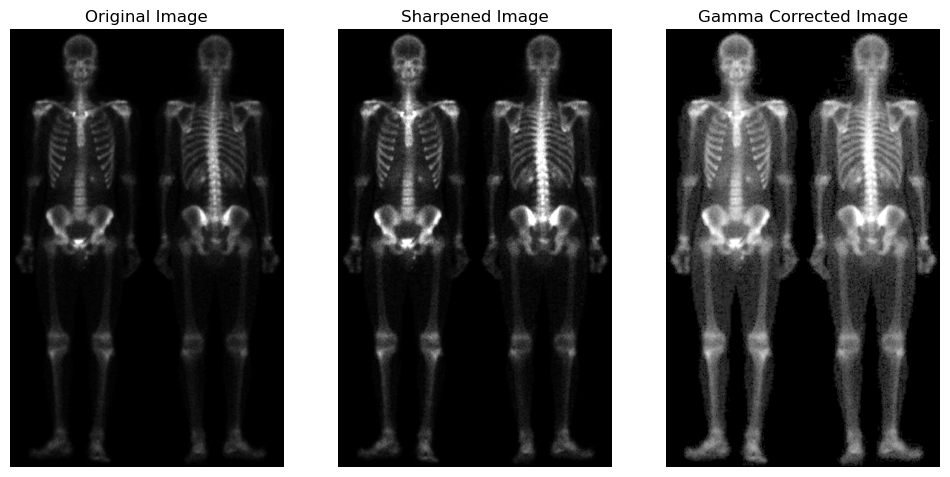

In [8]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_laplacian_filter(image):
    """Apply Laplacian filter to the image to enhance edges."""
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return laplacian

def sharpen_image(original_image, laplacian):
    """Sharpen the image using Laplacian edge detection."""
    # Convert Laplacian result to the same type as the original image
    laplacian = cv2.convertScaleAbs(laplacian)
    # Sharpen by subtracting the Laplacian from the original image
    sharpened = cv2.addWeighted(original_image, 1.5, laplacian, -0.5, 0)
    return sharpened

def apply_power_law_transformation(image, gamma):
    """Apply power-law (gamma) transformation to the image."""
    # Normalize the image to [0, 1]
    image_normalized = image / 255.0
    # Apply power-law transformation
    image_gamma_corrected = np.power(image_normalized, gamma)
    # Scale back to [0, 255]
    image_gamma_corrected = np.uint8(image_gamma_corrected * 255)
    return image_gamma_corrected

# Load the image
image = cv2.imread('C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env//pictures/skeleton.tif', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Laplacian filter
laplacian = apply_laplacian_filter(image)

# Step 2: Sharpen the image
sharpened_image = sharpen_image(image, laplacian)

# Step 3: Apply power-law transformation
gamma = 0.5  # You can adjust gamma value here
gamma_corrected_image = apply_power_law_transformation(sharpened_image, gamma)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.show()

### Problem 4

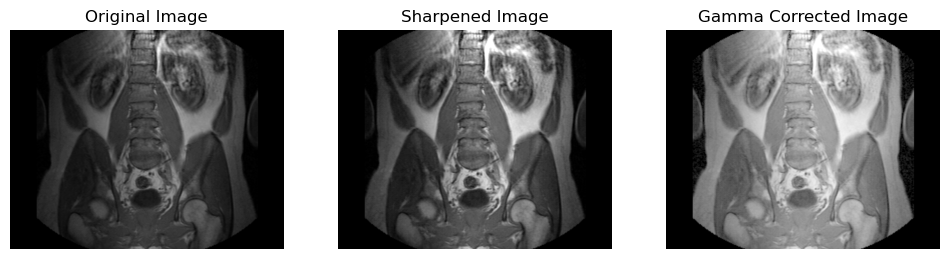

In [9]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_laplacian_filter(image):
    """Apply Laplacian filter to the image to enhance edges."""
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return laplacian

def sharpen_image(original_image, laplacian):
    """Sharpen the image using Laplacian edge detection."""
    # Convert Laplacian result to the same type as the original image
    laplacian = cv2.convertScaleAbs(laplacian)
    # Sharpen by subtracting the Laplacian from the original image
    sharpened = cv2.addWeighted(original_image, 1.5, laplacian, -0.5, 0)
    return sharpened

def apply_power_law_transformation(image, gamma):
    """Apply power-law (gamma) transformation to the image."""
    # Normalize the image to [0, 1]
    image_normalized = image / 255.0
    # Apply power-law transformation
    image_gamma_corrected = np.power(image_normalized, gamma)
    # Scale back to [0, 255]
    image_gamma_corrected = np.uint8(image_gamma_corrected * 255)
    return image_gamma_corrected

# Load the image
image = cv2.imread('C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env//pictures/Image9.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Laplacian filter
laplacian = apply_laplacian_filter(image)

# Step 2: Sharpen the image
sharpened_image = sharpen_image(image, laplacian)

# Step 3: Apply power-law transformation
gamma = 0.5  # You can adjust gamma value here
gamma_corrected_image = apply_power_law_transformation(sharpened_image, gamma)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.show()